
# Introduction to Machine Learning

An interactive Machine Learning example written in Python, broken into the following sections:

1. [Scope](#scope)
  1. [Problem Definition](#scope-problem-definition)
  1. [Data](#scope-data)
1. [Prepare](#prepare)
  1. [Import](#prepare-import)
  1. [Train Test Split](#prepare-train-test-split)
  1. [Cleaning](#prepare-cleaning)
1. [Analyze](#analyze)
  1. [Pre-processing](#analyze-pre-processing)
  1. [Modeling](#analyze-modeling)
  1. [Hyper-parameter Tuning](#analyze-hyper-parameter-tuning)
1. [Reflect](#reflect)

<a id='scope'></a>

## Scope

<a id='scope-problem-definition'></a>

### Problem Definition

We seek to answer the following questions by applying Machine Learning techniques to the NYC Mayor's Office of Sustainability dataset on green buildings and energy efficiency:

1. Given a buidling's characteristics, can we predict what its energy usage intensity will be?
  - Could be useful for urban planners to proactively estimate energy consumption of various of living spaces.
1. Given a buidling's characteristics and energy use, can we predict what its Energy Star rating would be?
  - Could be useful for Energy Star to assist in assigning ratings to buildings without a score.
  - Could be useful for architects to predict the Energy Star scores of different designs.
1. What sources of energy cause the most greenhouse gas emissions for a property?
  - Could be useful for policy makers to see what sources of energy produce the most greenhouse gas emissions.
1. What factors lead to energy loss between the source of generation and the site of the property?
  - Could be useful for engineers to identify which locations, property usages, sources of energy, etc. lead to the most energy loss and adjust the energy grid accordingly.

<a id='scope-data'></a>

### Data

#### Citation

```
NYC Mayor's Office of Sustainability, Green Buildings & Energy Efficiency. (2017). [Data set]. 
    Retrieved from http://www.nyc.gov/html/gbee/html/plan/ll84_scores.shtml
```

#### Dimensions

| Column                                                     | Functional Data Type    | Technical Data Type |
|------------------------------------------------------------|-------------------------|---------------------|
| Order                                                      | index                   | integer             |
| Property Id                                                | identifier              | text                |
| Property Name                                              | identifier              | text                |
| Parent Property Id                                         | identifier              | text                |
| Parent Property Name                                       | identifier              | text                |
| BBL - 10 digits                                            | identifier              | text                |
| NYC Borough, Block and Lot (BBL) self-reported             | identifier              | text                |
| NYC Building Identification Number (BIN)                   | identifier              | text                |
| Address 1 (self-reported)                                  | location                | text                |
| Address 2                                                  | location                | text                |
| Postal Code                                                | location                | text                |
| Street Number                                              | location                | text                |
| Street Name                                                | location                | text                |
| Borough                                                    | location                | catagorical         |
| DOF Gross Floor Area                                       | building characteristic | numeric             |
| Primary Property Type - Self Selected                      | building characteristic | categorical         |
| List of All Property Use Types at Property                 | building characteristic | [categorical]       |
| Largest Property Use Type                                  | building characteristic | categorical         |
| Largest Property Use Type - Gross Floor Area (ft²)         | building characteristic | numeric             |
| 2nd Largest Property Use Type                              | building characteristic | categorical         |
| 2nd Largest Property Use - Gross Floor Area (ft²)          | building characteristic | numeric             |
| 3rd Largest Property Use Type                              | building characteristic | categorical         |
| 3rd Largest Property Use Type - Gross Floor Area (ft²)     | building characteristic | numeric             |
| Year Built                                                 | building characteristic | time                |
| Number of Buildings - Self-reported                        | building characteristic | integer             |
| Occupancy                                                  | building characteristic | percentage          |
| Metered Areas (Energy)                                     | building characteristic | categorical         |
| Metered Areas (Water)                                      | building characteristic | categorical         |
| ENERGY STAR Score                                          | score                   | numeric             |
| Site EUI (kBtu/ft²)                                        | energy usage            | numeric             |
| Weather Normalized Site EUI (kBtu/ft²)                     | energy usage            | numeric             |
| Weather Normalized Site Electricity Intensity (kWh/ft²)    | energy usage            | numeric             |
| Weather Normalized Site Natural Gas Intensity (therms/ft²) | energy usage            | numeric             |
| Weather Normalized Source EUI (kBtu/ft²)                   | energy usage            | numeric             |
| Fuel Oil #1 Use (kBtu)                                     | energy usage            | numeric             |
| Fuel Oil #2 Use (kBtu)                                     | energy usage            | numeric             |
| Fuel Oil #4 Use (kBtu)                                     | energy usage            | numeric             |
| Fuel Oil #5 &amp; 6 Use (kBtu)                             | energy usage            | numeric             |
| Diesel #2 Use (kBtu)                                       | energy usage            | numeric             |
| District Steam Use (kBtu)                                  | energy usage            | numeric             |
| Natural Gas Use (kBtu)                                     | energy usage            | numeric             |
| Weather Normalized Site Natural Gas Use (therms)           | energy usage            | numeric             |
| Electricity Use - Grid Purchase (kBtu)                     | energy usage            | numeric             |
| Weather Normalized Site Electricity (kWh)                  | energy usage            | numeric             |
| Total GHG Emissions (Metric Tons CO2e)                     | environmental footprint | numeric             |
| Direct GHG Emissions (Metric Tons CO2e)                    | environmental footprint | numeric             |
| Indirect GHG Emissions (Metric Tons CO2e)                  | environmental footprint | numeric             |
| Property GFA - Self-Reported (ft²)                         | building characteristic | numeric             |
| Water Use (All Water Sources) (kgal)                       | resource usage          | numeric             |
| Water Intensity (All Water Sources) (gal/ft²)              | resource usage          | numeric             |
| Source EUI (kBtu/ft²)                                      | energy usage            | numeric             |
| Release Date                                               | metadata                | time                |
| Water Required?                                            | building characteristic | categorical         |
| DOF Benchmarking Submission Status                         | metadata                | categorical         |

<a id='prepare'></a>

## Prepare

<a id='prepare-import'></a>

### Import

In [1]:
import os
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the data
data_path = os.path.join(os.path.abspath('..'), 'data', 'nyc_benchmarking_disclosure_data_reported_in_2017.xlsx')
df = pd.read_excel(data_path, sheet_name='Information and Metrics')

In [3]:
# View the structure of the data
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,2017-05-01 17:32:03,No,In Compliance
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,2017-04-27 11:23:27,No,In Compliance
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,0,0,0,231342,Not Available,Not Available,Not Available,2017-04-27 11:23:27,No,In Compliance
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,0,0,0,1305748,Not Available,Not Available,Not Available,2017-04-27 11:23:27,No,In Compliance
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,0,0,0,179694,Not Available,Not Available,Not Available,2017-04-27 11:23:27,No,In Compliance


<a id='prepare-train-test-split'></a>

### Train Test Split

In [4]:
# Hold out a portion of the data for testing
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25)

# Furthermore, hold out a portion of the training set for validation
df_train, df_valid = train_test_split(df_train, test_size=0.25)

# Print the shape of each
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(6606, 54)
(2203, 54)
(2937, 54)


<a id='prepare-cleaning'></a>

### Cleaning

#### Missing Values

In [5]:
# Function to calculate the percent of missing values for each column in a data frame
def calc_percent_nan_col(df):
    return df.isna().sum(axis=0)/df.shape[0] * 100

In [6]:
# Function to calculate the percent of missing values for each row in a data frame
def calc_percent_nan_row(df):
    return df.isna().sum(axis=1)/df.shape[1] * 100

In [7]:
# Function to pretty print pandas objects in percent format (like 100.00%)
def pprint_percent(pd_obj):
    
    # Format percents like 100.00%
    original_format = pd.options.display.float_format
    pd.options.display.float_format = '{:.2f}%'.format
    
    # Print
    print()
    print(pd_obj)
    print()
    
    # Reset the pandas formatter
    pd.options.display.float_format = original_format

In [8]:
# Function to remove columns and rows that have over a certain percent missing values
def clean_missing_values(df, col_perc=33, row_perc=33):

    # Remove all columns that have more than 33% missing values
    df = df.loc[:, calc_percent_nan_col(df) < col_perc]
    
    # Remove all rows that have more than 33% missing values
    df = df.loc[calc_percent_nan_row(df) < row_perc, :]
    
    return df

Percent NaNs in each column - before cleaning
---------------------------------------------

Order                                                         0.00%
Property Id                                                   0.00%
Property Name                                                 0.00%
Parent Property Id                                            0.00%
Parent Property Name                                          0.00%
BBL - 10 digits                                               0.00%
NYC Borough, Block and Lot (BBL) self-reported                0.11%
NYC Building Identification Number (BIN)                      1.21%
Address 1 (self-reported)                                     0.00%
Address 2                                                    98.29%
Postal Code                                                   0.00%
Street Number                                                 1.01%
Street Name                                                   1.00%
Borough                

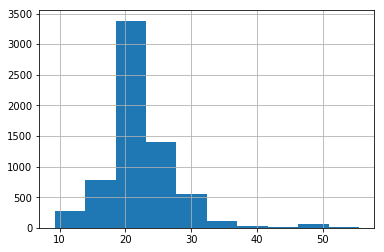

Percent NaNs in each column - after cleaning
--------------------------------------------

Order                                                         0.00%
Property Id                                                   0.00%
Property Name                                                 0.00%
Parent Property Id                                            0.00%
Parent Property Name                                          0.00%
BBL - 10 digits                                               0.00%
NYC Borough, Block and Lot (BBL) self-reported                0.11%
NYC Building Identification Number (BIN)                      1.22%
Address 1 (self-reported)                                     0.00%
Postal Code                                                   0.00%
Street Number                                                 0.90%
Street Name                                                   0.88%
Borough                                                       0.87%
DOF Gross Floor Area     

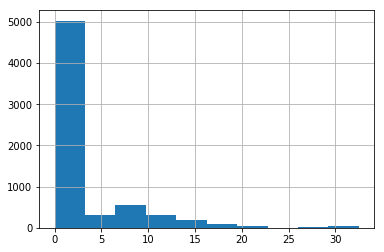

In [9]:
# Replace 'Not Available' with NaN
df_train = df_train.replace('Not Available', np.NaN)
    
# See what percent of each column in the training set is missing values
print('Percent NaNs in each column - before cleaning')
print('---------------------------------------------')
pprint_percent(calc_percent_nan_col(df_train))

# See what percent of each row in the training set is missing values
hist = calc_percent_nan_row(df_train).hist()
print('Percent NaNs in each row - before cleaning')
print('------------------------------------------')
plt.show()

# Clean
df_train = clean_missing_values(df_train)

# See what percent of each column in the training set is missing values, after cleaning
print('Percent NaNs in each column - after cleaning')
print('--------------------------------------------')
pprint_percent(calc_percent_nan_col(df_train))

# See what percent of each row in the training set is missing values, after cleaning
print('Percent NaNs in each row - after cleaning')
print('-----------------------------------------')
hist = calc_percent_nan_row(df_train).hist()
plt.show()


#### Column Names

In [10]:
# Look at the existing column names
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(list(df.columns))

[   'Order',
    'Property Id',
    'Property Name',
    'Parent Property Id',
    'Parent Property Name',
    'BBL - 10 digits',
    'NYC Borough, Block and Lot (BBL) self-reported',
    'NYC Building Identification Number (BIN)',
    'Address 1 (self-reported)',
    'Address 2',
    'Postal Code',
    'Street Number',
    'Street Name',
    'Borough',
    'DOF Gross Floor Area',
    'Primary Property Type - Self Selected',
    'List of All Property Use Types at Property',
    'Largest Property Use Type',
    'Largest Property Use Type - Gross Floor Area (ft²)',
    '2nd Largest Property Use Type',
    '2nd Largest Property Use - Gross Floor Area (ft²)',
    '3rd Largest Property Use Type',
    '3rd Largest Property Use Type - Gross Floor Area (ft²)',
    'Year Built',
    'Number of Buildings - Self-reported',
    'Occupancy',
    'Metered Areas (Energy)',
    'Metered Areas  (Water)',
    'ENERGY STAR Score',
    'Site EUI (kBtu/ft²)',
    'Weather Normalized Site EUI (kBtu/ft²)',
 

In [11]:
# Rename columns so that they are easier to reference
df = df.rename(index=str, columns={"Order": "order", 
                              "Property Id": "id", 
                              "Property Name": "name", 
                              "Parent Property Id": "prnt_id", 
                              "Parent Property Name": "prnt_name", 
                              "BBL - 10 digits": "brgh_blck_lt", 
                              "NYC Borough, Block and Lot (BBL) self-reported": "brgh_blck_lt_self", 
                              "NYC Building Identification Number (BIN)": "bldng_id_no", 
                              "Address 1 (self-reported)": "addr_1_self", 
                              "Postal Code": "zip_code", 
                              "Street Number": "st_no", 
                              "Street Name": "st_name", 
                              "Borough": "brgh", 
                              "DOF Gross Floor Area": "flr_area", 
                              "Primary Property Type - Self Selected": "prim_type", 
                              "List of All Property Use Types at Property": "all_type", 
                              "Largest Property Use Type": "lgst_type", 
                              "Largest Property Use Type - Gross Floor Area (ft²)": "lgst_type_area", 
                              "Year Built": "year_built", 
                              "Number of Buildings - Self-reported": "no_bldngs", 
                              "Occupancy": "occupancy", 
                              "Metered Areas (Energy)": "mtrd_area_energy", 
                              "ENERGY STAR Score": "energy_star", 
                              "Site EUI (kBtu/ft²)": "eui", 
                              "Weather Normalized Site EUI (kBtu/ft²)": "wthr_norm_site_eui", 
                              "Weather Normalized Site Electricity Intensity (kWh/ft²)": "wthr_norm_site_elec_int", 
                              "Weather Normalized Site Natural Gas Intensity (therms/ft²)": "wthr_norm_site_gas_int", 
                              "Weather Normalized Source EUI (kBtu/ft²)": "wthr_norm_src_eui", 
                              "Natural Gas Use (kBtu)": "gas", 
                              "Weather Normalized Site Natural Gas Use (therms)": "wthr_norm_gas", 
                              "Electricity Use - Grid Purchase (kBtu)": "elec", 
                              "Weather Normalized Site Electricity (kWh)": "wthr_norm_elec", 
                              "Total GHG Emissions (Metric Tons CO2e)": "co2_tot", 
                              "Direct GHG Emissions (Metric Tons CO2e)": "co2_dir", 
                              "Indirect GHG Emissions (Metric Tons CO2e)": "co2_ind", 
                              "Property GFA - Self-Reported (ft²)": "gfa_self", 
                              "Source EUI (kBtu/ft²)": "src_eui", 
                              "Release Date": "rel_date", 
                              "Water Required?": "water_req", 
                              "DOF Benchmarking Submission Status": "dof_bnchmrkng_sub_status"})
pp.pprint(list(df.columns))

[   'order',
    'id',
    'name',
    'prnt_id',
    'prnt_name',
    'brgh_blck_lt',
    'brgh_blck_lt_self',
    'bldng_id_no',
    'addr_1_self',
    'Address 2',
    'zip_code',
    'st_no',
    'st_name',
    'brgh',
    'flr_area',
    'prim_type',
    'all_type',
    'lgst_type',
    'lgst_type_area',
    '2nd Largest Property Use Type',
    '2nd Largest Property Use - Gross Floor Area (ft²)',
    '3rd Largest Property Use Type',
    '3rd Largest Property Use Type - Gross Floor Area (ft²)',
    'year_built',
    'no_bldngs',
    'occupancy',
    'mtrd_area_energy',
    'Metered Areas  (Water)',
    'energy_star',
    'eui',
    'wthr_norm_site_eui',
    'wthr_norm_site_elec_int',
    'wthr_norm_site_gas_int',
    'wthr_norm_src_eui',
    'Fuel Oil #1 Use (kBtu)',
    'Fuel Oil #2 Use (kBtu)',
    'Fuel Oil #4 Use (kBtu)',
    'Fuel Oil #5 & 6 Use (kBtu)',
    'Diesel #2 Use (kBtu)',
    'District Steam Use (kBtu)',
    'gas',
    'wthr_norm_gas',
    'elec',
    'wthr_norm_elec

#### Column Types

In [12]:
# See what the column types are now
# Will want to change these based on the dimensions table above
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11746 entries, 0 to 11745
Data columns (total 54 columns):
order                                                     11746 non-null int64
id                                                        11746 non-null int64
name                                                      11746 non-null object
prnt_id                                                   11746 non-null object
prnt_name                                                 11746 non-null object
brgh_blck_lt                                              11746 non-null object
brgh_blck_lt_self                                         11746 non-null object
bldng_id_no                                               11746 non-null object
addr_1_self                                               11746 non-null object
Address 2                                                 11746 non-null object
zip_code                                                  11746 non-null object
st_no             

In [13]:
# Set the column types appropriately
df = df.astype(dtype={"order": "int64", 
                              "id": "object", 
                              "name": "object", 
                              "prnt_id": "object", 
                              "prnt_name": "object", 
                              "brgh_blck_lt": "object", 
                              "brgh_blck_lt_self": "object", 
                              "bldng_id_no": "object", 
                              "addr_1_self": "object", 
                              "zip_code": "object", 
                              "st_no": "object", 
                              "st_name": "object", 
                              "brgh": "category", 
                              "flr_area": "float64", 
                              "prim_type": "category", 
                              "all_type": "object", 
                              "lgst_type": "category", 
                              "lgst_type_area": "float64", 
                              "year_built": "datetime64[ns]", 
                              "no_bldngs": "int64", 
                              "occupancy": "float64", 
                              "mtrd_area_energy": "category", 
                              "energy_star": "float64", 
                              "eui": "float64", 
                              "wthr_norm_site_eui": "float64", 
                              "wthr_norm_site_elec_int": "float64", 
                              "wthr_norm_site_gas_int": "float64", 
                              "wthr_norm_src_eui": "float64", 
                              "gas": "float64", 
                              "wthr_norm_gas": "float64", 
                              "elec": "float64", 
                              "wthr_norm_elec": "float64", 
                              "co2_tot": "float64", 
                              "co2_dir": "float64", 
                              "co2_ind": "float64", 
                              "gfa_self": "float64", 
                              "src_eui": "float64", 
                              "rel_date": "datetime64[ns]", 
                              "water_req": "category", 
                              "dof_bnchmrkng_sub_status": "category"})
df.info()

ValueError: could not convert string to float: 'Not Available'

#### Outliers

In [ ]:
# Remove mild outliers
# https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm

# Inner quartile
q1 = df.quantile(0.24)
q3 = df.quantile(0.75)
iq = q3 - q1

# Lower bound
lb = q1 - 3 * iq

# Upper bound
ub = q3 + 3 * iq

# Remove the outliers
for col in lb.index:
    df = df.loc[df[col] >= lb[col], :] # Remove lower-bound outliers
    df = df.loc[df[col] <= ub[col], :] # Remove upper-bound outliers

In [ ]:
# Now we have cleaner numeric columns
hist = df.hist(figsize=(30, 30))

#### Imputation

<a id='analyze'></a>

## Analyze

<a id='analyze-pre-processing'></a>

### Pre-processing

<a id='analyze-modeling'></a>

### Modeling

<a id='analyze-hyper-parameter-tuning'></a>

### Hyper-parameter Tuning

<a id='reflect'></a>

## Reflect